In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score

wwine = pd.read_csv('winequality-white.csv', delimiter = ';')
rwine = pd.read_csv('winequality-red.csv', delimiter = ';')

# White Wine = 0, Red Wine = 1
wwine['wine_type'] = '0'
rwine['wine_type'] = '1'

wines = pd.concat([wwine, rwine])

X = wines.drop(['quality'], axis = 1)
y = wines['quality']
y = np.array(y)

In [63]:
# Scaling
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 2)

In [64]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
version_lr = accuracy_score(y_test, model_lr_prediction)
version_lr

0.553076923076923

In [65]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.2819052092058364

Maximum:  0.56
Mean:  0.46343610297518106


<AxesSubplot:>

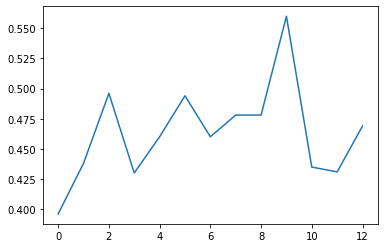

In [66]:
# K-Fold Logistic Regression
lr_plot = cross_val_score(LogisticRegression(), X, y, cv=13)
print('Maximum: ', lr_plot.max())
print('Mean: ', lr_plot.mean())
lr_plot = pd.Series(lr_plot)
lr_plot.plot()

In [67]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_predict = model_dt.predict(X_test)
version_dt = accuracy_score(y_test, y_predict)
version_dt

0.6015384615384616

In [68]:
confus_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted 3', 'Predicted 4', 'Predicted 5', 'Predicted 6', 'Predicted 7', 'Predicted 8', 'Predicted 9'],
    index=['True 3', 'True 4', 'True 5', 'True 6', 'True 7', 'True 8', 'True 9']
    )
confus_matrix

,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
True 3,0,2,1,0,0,0,0
True 4,0,13,19,14,4,0,0
True 5,0,16,279,105,25,3,0
True 6,2,6,120,355,73,11,0
True 7,0,2,23,56,121,11,1
True 8,0,1,1,9,12,14,0
True 9,0,0,0,0,0,1,0


In [69]:
kappa_dt = cohen_kappa_score(y_test, y_predict)
kappa_dt

0.40981905441338606

Maximum:  0.5423728813559322
Mean:  0.4793016475050373


<AxesSubplot:>

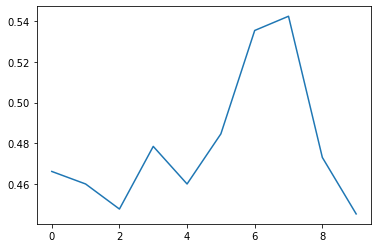

In [70]:
# K-Fold DecisionTree
dt_plot = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=10)
print('Maximum: ', dt_plot.max())
#cvs_dt = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=10).mean()
print('Mean: ', dt_plot.mean())
dt_plot = pd.Series(dt_plot)
dt_plot.plot()

In [71]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
version_knn = accuracy_score(y_test, model_knn_prediction)
version_knn

0.5646153846153846

In [72]:
confus_matrix = pd.DataFrame(
    confusion_matrix(y_test, model_knn_prediction),
    columns=['Predicted 3', 'Predicted 4', 'Predicted 5', 'Predicted 6', 'Predicted 7', 'Predicted 8', 'Predicted 9'],
    index=['True 3', 'True 4', 'True 5', 'True 6', 'True 7', 'True 8', 'True 9']
    )
confus_matrix

,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
True 3,0,0,1,2,0,0,0
True 4,0,4,26,20,0,0,0
True 5,0,2,274,141,7,4,0
True 6,0,0,140,368,55,4,0
True 7,0,0,13,107,88,6,0
True 8,0,0,2,21,14,0,0
True 9,0,0,0,0,1,0,0


In [73]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.32187519296328015

Maximum:  0.4907692307692308
Mean:  0.42911176958634584


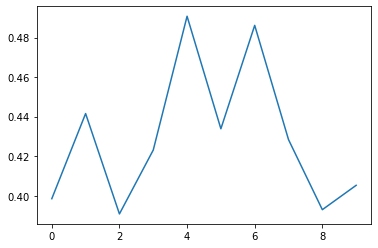

In [74]:
# K-Fold KNN
knn_plot = cross_val_score(KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2), X, y, cv=10)
print('Maximum: ', knn_plot.max())
knn_plot = pd.Series(knn_plot)
knn_plot.plot()

print('Mean: ', knn_plot.mean())

In [75]:
# SVM
model_svm = SVC(kernel='linear').fit(X_train, y_train)
model_svm_prediction = model_svm.predict(X_test)
version_svm = accuracy_score(y_test, model_svm_prediction)
version_svm

0.5423076923076923

In [76]:
kappa_svm = cohen_kappa_score(y_test, model_svm_prediction)
kappa_svm

0.2371200517594566

In [77]:
model_svm2 = SVC(kernel='poly').fit(X_train, y_train)
model_svm_prediction2 = model_svm2.predict(X_test)
version_svm2 = accuracy_score(y_test, model_svm_prediction2)
version_svm2

0.546923076923077

In [78]:
kappa_svm2 = cohen_kappa_score(y_test, model_svm_prediction2)
kappa_svm2

0.25211682097393784

In [79]:
model_svm3 = SVC(kernel='rbf').fit(X_train, y_train)
model_svm_prediction3 = model_svm3.predict(X_test)
version_svm3 = accuracy_score(y_test, model_svm_prediction3)
version_svm3

0.5776923076923077

In [80]:
confus_matrix = pd.DataFrame(
    confusion_matrix(y_test, model_svm_prediction3),
    columns=['Predicted 3', 'Predicted 4', 'Predicted 5', 'Predicted 6', 'Predicted 7', 'Predicted 8', 'Predicted 9'],
    index=['True 3', 'True 4', 'True 5', 'True 6', 'True 7', 'True 8', 'True 9']
    )
confus_matrix

,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
True 3,0,0,1,2,0,0,0
True 4,0,1,33,16,0,0,0
True 5,0,0,269,158,1,0,0
True 6,0,0,110,433,24,0,0
True 7,0,0,6,160,48,0,0
True 8,0,0,1,26,10,0,0
True 9,0,0,0,0,1,0,0


In [81]:
print(classification_report(y_test,model_svm_prediction3, target_names=['3', '4', '5', '6', '7', '8', '9']))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.02      0.04        50
           5       0.64      0.63      0.63       428
           6       0.54      0.76      0.64       567
           7       0.57      0.22      0.32       214
           8       0.00      0.00      0.00        37
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1300
   macro avg       0.39      0.23      0.23      1300
weighted avg       0.58      0.58      0.54      1300



In [82]:
kappa_svm3 = cohen_kappa_score(y_test, model_svm_prediction3)
kappa_svm3

0.3147048007151575

In [128]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=700).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
version_rf = accuracy_score(y_test, model_rf_prediction)
version_rf

0.7061538461538461

In [129]:
print(classification_report(y_test,model_rf_prediction, target_names=['3', '4', '5', '6', '7', '8', '9']))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.89      0.16      0.27        50
           5       0.74      0.73      0.74       428
           6       0.67      0.82      0.73       567
           7       0.75      0.57      0.64       214
           8       1.00      0.35      0.52        37
           9       0.00      0.00      0.00         1

    accuracy                           0.71      1300
   macro avg       0.58      0.37      0.42      1300
weighted avg       0.72      0.71      0.69      1300



In [130]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.5401890169433774

In [131]:
confus_matrix = pd.DataFrame(
    confusion_matrix(y_test, model_rf_prediction),
    columns=['Predicted 3', 'Predicted 4', 'Predicted 5', 'Predicted 6', 'Predicted 7', 'Predicted 8', 'Predicted 9'],
    index=['True 3', 'True 4', 'True 5', 'True 6', 'True 7', 'True 8', 'True 9']
    )
confus_matrix

,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
True 3,0,1,1,1,0,0,0
True 4,0,8,29,13,0,0,0
True 5,0,0,312,113,3,0,0
True 6,0,0,75,464,28,0,0
True 7,0,0,3,90,121,0,0
True 8,0,0,0,14,10,13,0
True 9,0,0,0,1,0,0,0


<AxesSubplot:>

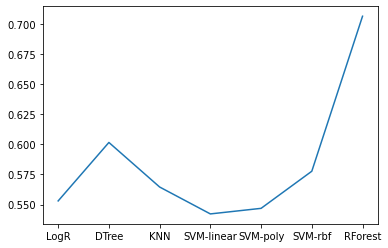

In [134]:
acc = [version_lr, version_dt, version_knn, version_svm, version_svm2, version_svm3, version_rf]
acc = pd.Series(acc)

exploration_methods = ['LogR', 'DTree', 'KNN', 'SVM-linear', 'SVM-poly', 'SVM-rbf', 'RForest']
plt.xticks(np.arange(7) , exploration_methods, rotation = 'vertical')
acc.plot()


<AxesSubplot:>

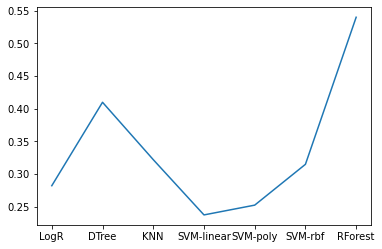

In [139]:
kappa_overview = [kappa_lr, kappa_dt, kappa_knn, kappa_svm, kappa_svm2, kappa_svm3, kappa_rf]
kappa_overview = pd.Series(kappa_overview)

#exploration_methods = ['LogR', 'DTree', 'KNN', 'SVM-linear', 'SVM-poly', 'SVM-rbf', 'RForest']
plt.xticks(np.arange(7), exploration_methods, rotation='45')
kappa_overview.plot()

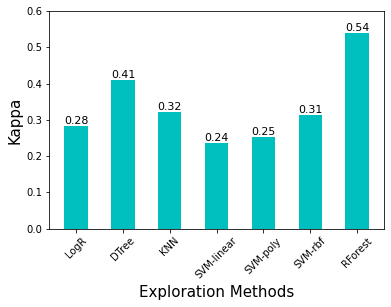

In [155]:
plt.bar(x=exploration_methods, height = kappa_overview, color = 'c', width = 0.5)
#plt.grid()
#plt.title('Efficiency of Machine Learning in Prediction of Quality by Chemical Measures')
plt.xlabel('Exploration Methods', fontsize=15)
plt.ylabel('Kappa', fontsize=15)
plt.xticks(rotation=45)
plt.ylim(0, 0.6)

for i in range(7):
  plt.text(
      x = i, 
      y = kappa_overview[i], 
      s = round(kappa_overview[i], 2), 
      horizontalalignment='center',
      verticalalignment='bottom',
      size = 11)

plt.show()